EDA

In [1]:
#importing libraries
import ast
import pandas as pd
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt 
import numpy as np

In [2]:
#loading dataset
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()
# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

<Axes: xlabel='count', ylabel='job_country'>

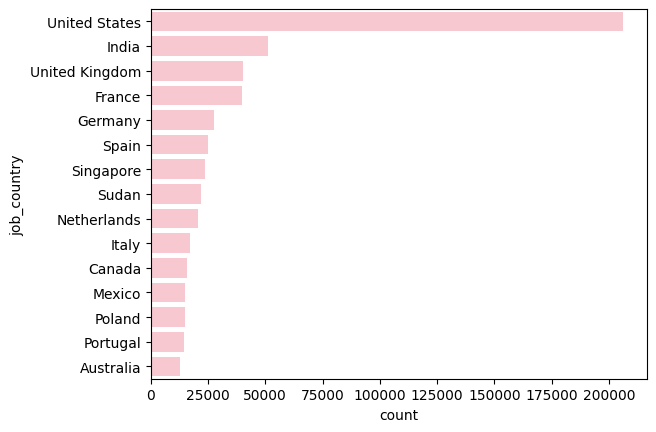

In [3]:
#highest number of jobs divided by countries
vc=df.job_country.value_counts()
srtd=vc.sort_values(ascending=False)
plot=srtd.head(15)
sns.barplot(y=plot.index,x=plot,color='pink')

<Axes: xlabel='count', ylabel='company_name'>

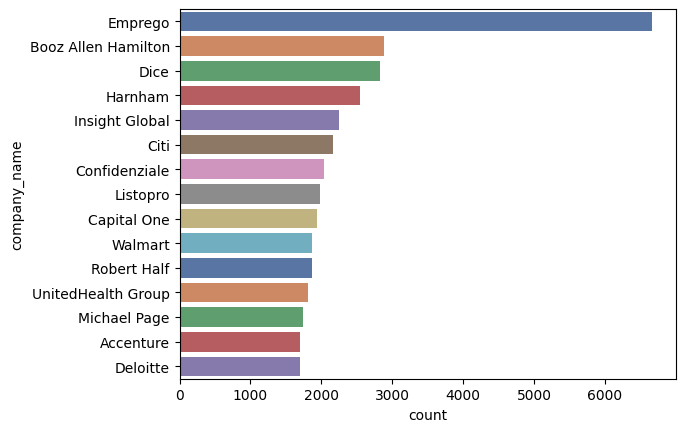

In [4]:
#number of jobs divided by companies 
vc2=df.company_name.value_counts()
srtd2=vc2.sort_values(ascending=False)
plot2=srtd2.head(15)
sns.barplot(y=plot2.index,x=plot2,palette='deep',hue=plot2.index)

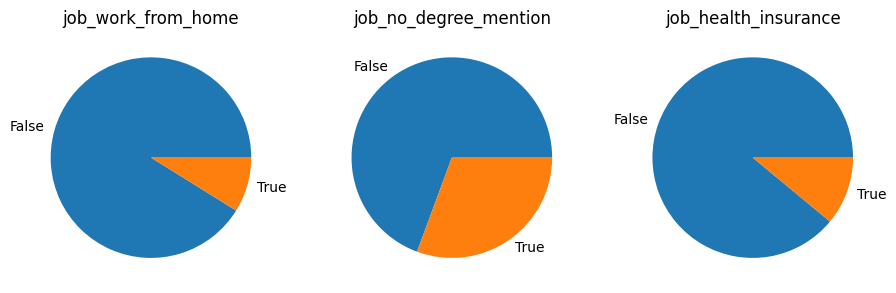

In [5]:
#Job Opportunities
vc3=df.job_work_from_home.value_counts()
vc4=df.job_no_degree_mention.value_counts()
vc5=df.job_health_insurance.value_counts()
plt.figure(figsize=(11, 3.5))
plt.subplot(1,3,1)
plt.pie(vc3,labels=vc3.index)
plt.title("job_work_from_home")
plt.subplot(1,3,2)
plt.pie(vc4,labels=vc4.index)
plt.title("job_no_degree_mention")
plt.subplot(1,3,3)
plt.pie(vc5,labels=vc5.index)
plt.title("job_health_insurance")
plt.show()

<Axes: xlabel='count', ylabel='job_location'>

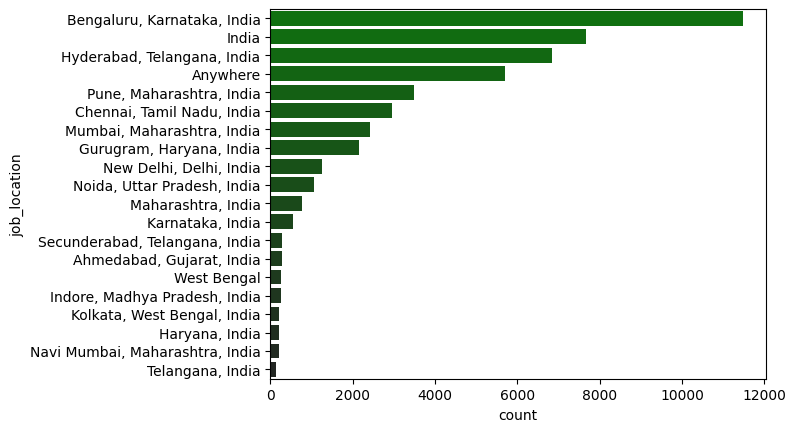

In [6]:
#Counts of Job Locations for Data Analyst in India
dum=df[df.job_country=="India"].copy()
vc6=dum.job_location.value_counts()
srtd6=vc6.sort_values(ascending=False).head(20)
sns.barplot(x=srtd6,y=srtd6.index,palette='dark:g_r',hue=srtd6.index)

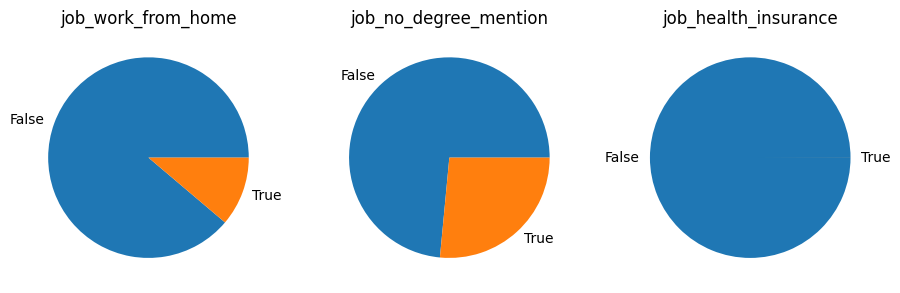

In [7]:
#job portfolios in india
vc7=dum.job_work_from_home.value_counts()
vc8=dum.job_no_degree_mention.value_counts()
vc9=dum.job_health_insurance.value_counts()
plt.figure(figsize=(11, 3.5))
plt.subplot(1,3,1)
plt.pie(vc7,labels=vc7.index)
plt.title("job_work_from_home")
plt.subplot(1,3,2)
plt.pie(vc8,labels=vc8.index)
plt.title("job_no_degree_mention")
plt.subplot(1,3,3)
plt.pie(vc9,labels=vc9.index)
plt.title("job_health_insurance")
plt.show()


<Axes: xlabel='count', ylabel='company_name'>

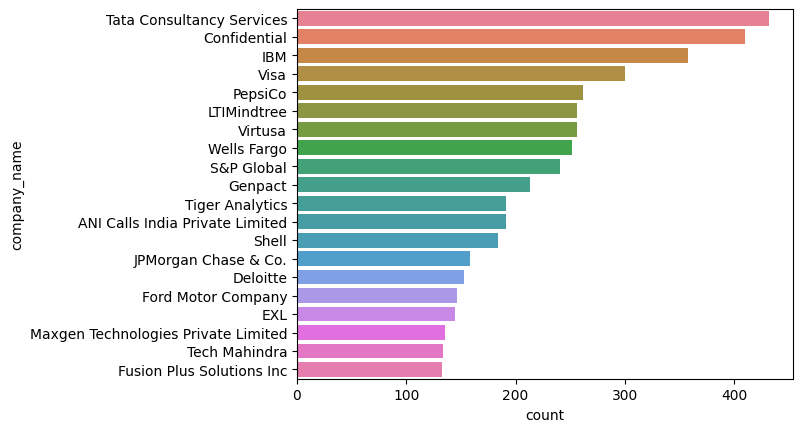

In [8]:
#Companies to Explore:
vc10=dum.company_name.value_counts()
srtd10=vc10.sort_values(ascending=False).head(20)
sns.barplot(x=srtd10,y=srtd10.index,hue=srtd10.index)


In [9]:
print(df.columns)

Index(['job_title_short', 'job_title', 'job_location', 'job_via',
       'job_schedule_type', 'job_work_from_home', 'search_location',
       'job_posted_date', 'job_no_degree_mention', 'job_health_insurance',
       'job_country', 'salary_rate', 'salary_year_avg', 'salary_hour_avg',
       'company_name', 'job_skills', 'job_type_skills'],
      dtype='object')


In [10]:
roles=df.job_title_short.value_counts().sort_values(ascending=False)
print(roles)

job_title_short
Data Analyst                 196075
Data Engineer                186241
Data Scientist               172286
Business Analyst              49063
Software Engineer             44929
Senior Data Engineer          44563
Senior Data Scientist         36957
Senior Data Analyst           29216
Machine Learning Engineer     14080
Cloud Engineer                12331
Name: count, dtype: int64


In [11]:
print('the three most popular data roles are:')
for i in roles.head(3).index:
    print(i)

the three most popular data roles are:
Data Analyst
Data Engineer
Data Scientist


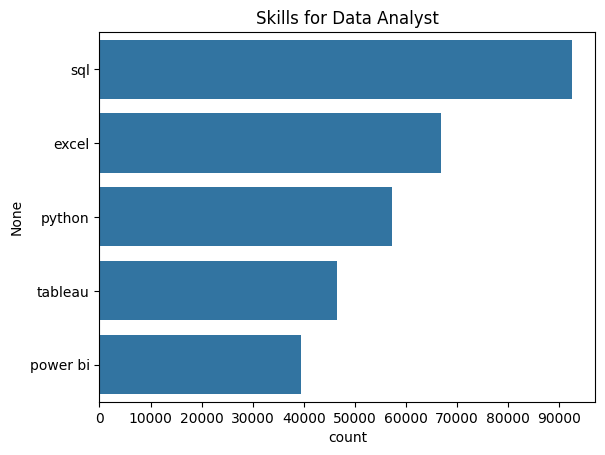

In [12]:
###skills for data analyst
da=df[(df.job_title_short=='Data Analyst')].copy()
da.dropna(subset=['job_skills'],inplace = True)
skills=[]
for i in da.job_skills:
    for j in i:
        skills.append(j)
ser1=pd.Series(skills)
d1=pd.DataFrame(ser1.value_counts().sort_values(ascending=False).head(5))
###skills for data engineer
de=df[(df.job_title_short=='Data Engineer')].copy()
de.dropna(subset=['job_skills'],inplace = True)
skills2=[]
for i in de.job_skills:
    for j in i:
        skills2.append(j)
ser2=pd.Series(skills2)
d2=pd.DataFrame(ser2.value_counts().sort_values(ascending=False).head(5))
###skills for data scientist
ds=df[(df.job_title_short=='Data Scientist')].copy()
ds.dropna(subset=['job_skills'],inplace = True)
skills3=[]
for i in ds.job_skills:
    for j in i:
        skills3.append(j)
ser3=pd.Series(skills3)
d3=pd.DataFrame(ser3.value_counts().sort_values(ascending=False).head(5))


sns.barplot(x=d1['count'],y=d1.index)
plt.xticks(ticks= [i for i in range (0,100000,10000)])
plt.title('Skills for Data Analyst')

plt.show()


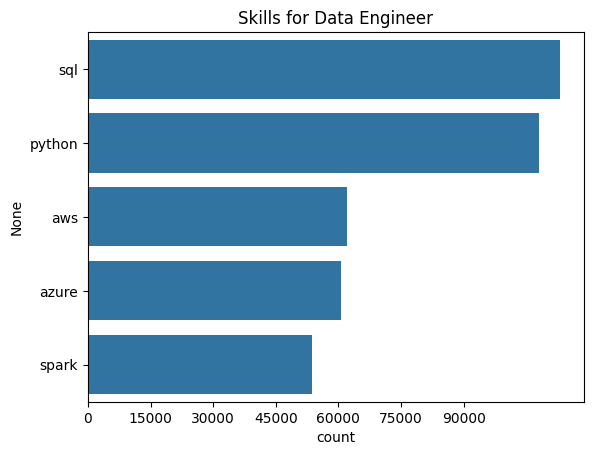

In [13]:
sns.barplot(y=d2.index,x=d2['count'])
plt.xticks(ticks= [i for i in range (0,100000,15000)])
plt.title('Skills for Data Engineer')
plt.show()

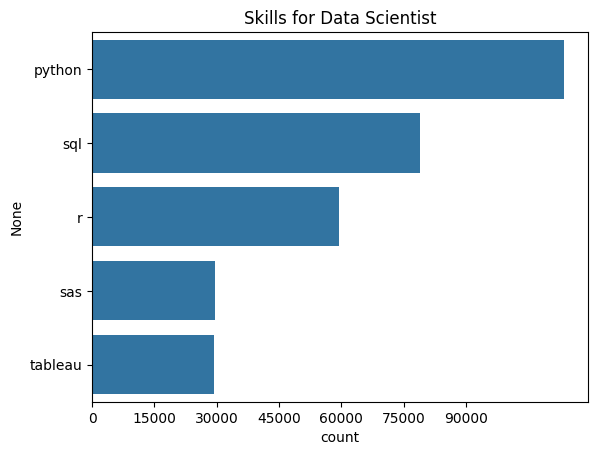

In [14]:
sns.barplot(y=d3.index,x=d3['count'])
plt.xticks(ticks= [i for i in range (0,100000,15000)])
plt.title('Skills for Data Scientist')
plt.show()

In [15]:
#we are concerned with the columns job_posted_date and job_skills , how skills trend with different months of year
#finding month part of each datetime object:
month=[]
for dt in df.job_posted_date:
    m=dt.month
    month.append(m)
df['job_month']=month


In [16]:
#dataframe of data analysts:
da=df[df.job_title_short=='Data Analyst'].copy()
da.reset_index(inplace=True)
print(da)

         index job_title_short  \
0            1    Data Analyst   
1           12    Data Analyst   
2           18    Data Analyst   
3           31    Data Analyst   
4           34    Data Analyst   
...        ...             ...   
196070  785703    Data Analyst   
196071  785705    Data Analyst   
196072  785715    Data Analyst   
196073  785717    Data Analyst   
196074  785737    Data Analyst   

                                                job_title  \
0                                            Data Analyst   
1             Stagiaire Data Analyst (H/F) - Lyon (69006)   
2                                            Data Analyst   
3                                Stage - Data Analyst F/H   
4       Data Analyst als Marketing Manager Automation ...   
...                                                   ...   
196070            Data Analyst - CRYPTOGRAPHY - Full-time   
196071          Expert Business Data Analyst - Now Hiring   
196072  Amul Careers 2023 - Apply Online -

In [17]:
def skills_in_month(month):
    skills=[]
    for i in range (0, len(da)):
         if (da['job_month'][i]==month) and (da['job_skills'][i] != None):
            for j in da.job_skills[i]:
                skills.append(j)
    skills_series=pd.Series(skills)
    return skills_series.value_counts().sort_values(ascending=False).head(5)


In [18]:
dict={}
for i in range(1,13):
    dict[i]=skills_in_month(i)

monthskill=pd.DataFrame(dict)
monthskill=monthskill.transpose()
print(monthskill)

      sql  excel  python  tableau  power bi
1   11336   8170    6606     5596      4285
2    7947   5772    4751     3936      3307
3    7868   5675    4741     4051      3176
4    7553   5496    4557     3776      3106
5    6617   4773    4070     3245      2695
6    7584   5724    4707     3812      3275
7    7687   5513    4831     3928      3350
8    8823   6482    5576     4533      3859
9    6829   4886    4229     3446      3118
10   7474   5217    4693     3709      3340
11   6652   4776    4233     3284      3012
12   6058   4376    4196     3139      2857


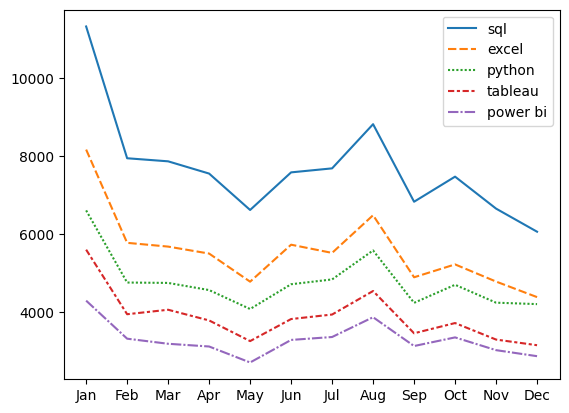

In [19]:
plt.plot()
sns.lineplot(monthskill)
plt.xticks(ticks= [i for i in range (1,13)],labels=["Jan", "Feb", "Mar", "Apr", "May", "Jun",  "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"])
plt.show()

In [20]:
top_jobs=df.job_title_short.value_counts().sort_values(ascending=False).head(6).index
print(top_jobs)

Index(['Data Analyst', 'Data Engineer', 'Data Scientist', 'Business Analyst',
       'Software Engineer', 'Senior Data Engineer'],
      dtype='object', name='job_title_short')


In [21]:
sample=df[df.job_title_short.isin(top_jobs)].dropna(subset=['salary_year_avg']).reset_index()
print(sample)

        index job_title_short  \
0          28  Data Scientist   
1          77   Data Engineer   
2          92   Data Engineer   
3         100  Data Scientist   
4         109    Data Analyst   
...       ...             ...   
18536  785624   Data Engineer   
18537  785641   Data Engineer   
18538  785648  Data Scientist   
18539  785682  Data Scientist   
18540  785692  Data Scientist   

                                               job_title  \
0                                    CRM Data Specialist   
1                                          Data Engineer   
2                Remote - Data Engineer - Permanent - W2   
3                Data Scientist, Risk Data Mining - USDS   
4                  Senior Supply Chain Analytics Analyst   
...                                                  ...   
18536                   Data Analytics Engineer (Hybrid)   
18537                                      Data Engineer   
18538  Director Data Scientist - Commercial Platforms...   
185

In [22]:
salary_sorted=sample.groupby('job_title_short')['salary_year_avg'].median().sort_values(ascending=False)
salary_sorted

job_title_short
Senior Data Engineer    147500.0
Data Scientist          127500.0
Data Engineer           125000.0
Software Engineer        99150.0
Data Analyst             90000.0
Business Analyst         85000.0
Name: salary_year_avg, dtype: float64

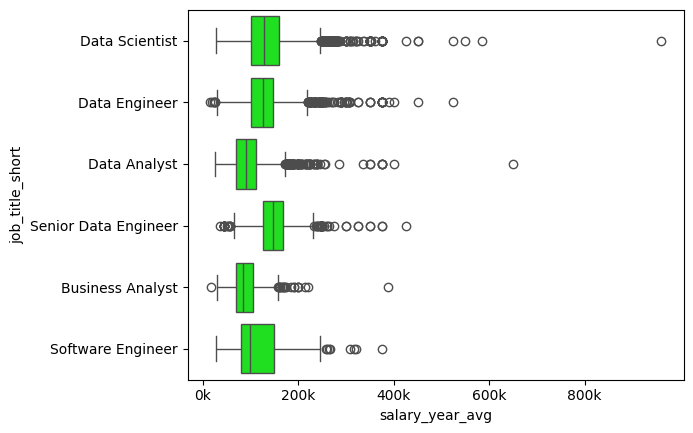

In [23]:
plt.plot()
sns.boxplot(y=sample.job_title_short,x=sample.salary_year_avg,color='lime')
plt.xticks(ticks=[0,200000,400000,600000,800000],labels=['0k','200k','400k','600k','800k'])
plt.show()

In [24]:
sample=sample[sample.job_title_short=='Data Analyst']


In [25]:
sample=sample.sort_values(by='salary_year_avg',ascending=False).dropna(subset=['job_skills'])
sample

,index,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills,job_month
14984,653444,Data Analyst,Data base administrator,Belarus,via GeekLink,Full-time,False,Belarus,2023-10-03 11:22:20,True,False,Belarus,year,400000.0,NaN,ЛАНИТ,"[oracle, kafka, linux, git, svn]","{'cloud': ['oracle'], 'libraries': ['kafka'], ...",10
3108,152334,Data Analyst,Director of Safety Data Analysis,"Austin, TX",via Ladders,Full-time,False,"Texas, United States",2023-04-21 08:01:55,False,True,United States,year,375000.0,NaN,Torc Robotics,"[python, sas, sas, r, matlab, sql, airflow, sp...","{'analyst_tools': ['sas', 'power bi', 'tableau...",4
10954,489470,Data Analyst,Head of Infrastructure Management & Data Analy...,"Jacksonville, FL",via Ladders,Full-time,False,Georgia,2023-07-03 11:30:01,False,False,United States,year,375000.0,NaN,"Citigroup, Inc","[word, excel]","{'analyst_tools': ['word', 'excel']}",7
5854,257755,Data Analyst,"HC Data Analyst , Senior","Bethesda, MD",via Ladders,Full-time,False,"New York, United States",2023-08-18 07:00:22,False,False,United States,year,375000.0,NaN,Illuminate Mission Solutions,"[vba, python, r, excel, tableau]","{'analyst_tools': ['excel', 'tableau'], 'progr...",8
18427,777579,Data Analyst,Head of Data Analytics,"Austin, TX",via Ladders,Full-time,False,"Texas, United States",2023-10-23 05:02:56,False,True,United States,year,350000.0,NaN,Care.com,"[python, r, sql, snowflake, bigquery, tableau,...","{'analyst_tools': ['tableau', 'power bi', 'loo...",10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9572,431473,Data Analyst,Analyst Invoice Processing (Data Operations),India,via Ai-Jobs.net,Full-time,False,India,2023-11-23 16:13:02,False,False,India,year,32400.0,NaN,BlackRock,"[excel, terminal]","{'analyst_tools': ['excel'], 'other': ['termin...",11
4306,203306,Data Analyst,Cloud and Data Security Analyst,New Zealand,via Infosec-Jobs.com,Full-time and Temp work,False,New Zealand,2023-11-22 22:26:05,False,False,New Zealand,year,32400.0,NaN,KPMG New Zealand,"[azure, aws, excel, word, outlook, powerpoint]","{'analyst_tools': ['excel', 'word', 'outlook',...",11
9201,416083,Data Analyst,Data Analyst,United Kingdom,via LinkedIn,Full-time,False,United Kingdom,2023-10-24 16:14:26,False,False,United Kingdom,year,30000.0,NaN,Humanity,"[sql, tableau, excel]","{'analyst_tools': ['tableau', 'excel'], 'progr...",10
9350,421841,Data Analyst,Data and Systems Analyst HODSA001,United Kingdom,via LinkedIn,Full-time,False,United Kingdom,2023-10-11 16:14:17,False,False,United Kingdom,year,30000.0,NaN,Humanity,"[sql, word, excel, powerpoint, outlook, tablea...","{'analyst_tools': ['word', 'excel', 'powerpoin...",10


In [26]:
med_sal=sample.salary_year_avg.median()
print(med_sal)

90000.0


In [27]:
sample=sample[sample.salary_year_avg>med_sal]
sample

,index,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills,job_month
14984,653444,Data Analyst,Data base administrator,Belarus,via GeekLink,Full-time,False,Belarus,2023-10-03 11:22:20,True,False,Belarus,year,400000.0,NaN,ЛАНИТ,"[oracle, kafka, linux, git, svn]","{'cloud': ['oracle'], 'libraries': ['kafka'], ...",10
3108,152334,Data Analyst,Director of Safety Data Analysis,"Austin, TX",via Ladders,Full-time,False,"Texas, United States",2023-04-21 08:01:55,False,True,United States,year,375000.0,NaN,Torc Robotics,"[python, sas, sas, r, matlab, sql, airflow, sp...","{'analyst_tools': ['sas', 'power bi', 'tableau...",4
10954,489470,Data Analyst,Head of Infrastructure Management & Data Analy...,"Jacksonville, FL",via Ladders,Full-time,False,Georgia,2023-07-03 11:30:01,False,False,United States,year,375000.0,NaN,"Citigroup, Inc","[word, excel]","{'analyst_tools': ['word', 'excel']}",7
5854,257755,Data Analyst,"HC Data Analyst , Senior","Bethesda, MD",via Ladders,Full-time,False,"New York, United States",2023-08-18 07:00:22,False,False,United States,year,375000.0,NaN,Illuminate Mission Solutions,"[vba, python, r, excel, tableau]","{'analyst_tools': ['excel', 'tableau'], 'progr...",8
18427,777579,Data Analyst,Head of Data Analytics,"Austin, TX",via Ladders,Full-time,False,"Texas, United States",2023-10-23 05:02:56,False,True,United States,year,350000.0,NaN,Care.com,"[python, r, sql, snowflake, bigquery, tableau,...","{'analyst_tools': ['tableau', 'power bi', 'loo...",10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2213,114080,Data Analyst,Data Analyst III,"La Palma, CA",via KLFY Jobs,Full-time,False,"California, United States",2023-03-09 08:01:23,False,True,United States,year,90250.0,NaN,Centene Pharmacy Services,"[sql, excel]","{'analyst_tools': ['excel'], 'programming': ['...",3
2622,128832,Data Analyst,Data Analyst III. Job in Palos Verdes Estates ...,"Palos Verdes Estates, CA",via My Valley Jobs Today,Full-time,False,"California, United States",2023-02-11 08:00:38,False,True,United States,year,90250.0,NaN,California Health & Wellness,"[excel, powerpoint]","{'analyst_tools': ['excel', 'powerpoint']}",2
9079,411982,Data Analyst,Data Analyst III,"Topanga, CA",via ComputerJobs,Full-time,False,"California, United States",2023-05-06 16:00:41,False,True,United States,year,90250.0,NaN,Centene Corporation,"[sql, excel]","{'analyst_tools': ['excel'], 'programming': ['...",5
3912,183599,Data Analyst,Data Analyst III. Job in Dos Palos My Valley J...,"Dos Palos, CA",via My Valley Jobs Today,Full-time,False,"California, United States",2023-05-15 15:00:39,False,True,United States,year,90250.0,NaN,Centene Pharmacy Services,"[sql, excel]","{'analyst_tools': ['excel'], 'programming': ['...",5


In [28]:
sample=sample.explode('job_skills')

In [29]:
high_payed=sample.groupby('job_skills')['salary_year_avg'].agg(['median','count']).sort_values(by='median',ascending=False).head(10)
print(high_payed)

                median  count
job_skills                   
svn           400000.0      1
dplyr         196250.0      2
node          180000.0      1
solidity      179000.0      1
gitlab        175500.0      4
hugging face  175000.0      1
django        175000.0      1
terraform     163782.0      3
couchbase     160515.0      1
ansible       159640.0      1


In [30]:
high_demand=sample.groupby('job_skills')['salary_year_avg'].agg(['median','count']).sort_values(by='count',ascending=False).head(10)
high_demand

,median,count
job_skills,,
sql,111175.0,1576
python,112015.0,1041
tableau,111202.0,873
excel,110000.0,799
r,112392.0,550
sas,110012.5,484
power bi,111175.0,466
powerpoint,111175.0,209
azure,111175.0,198


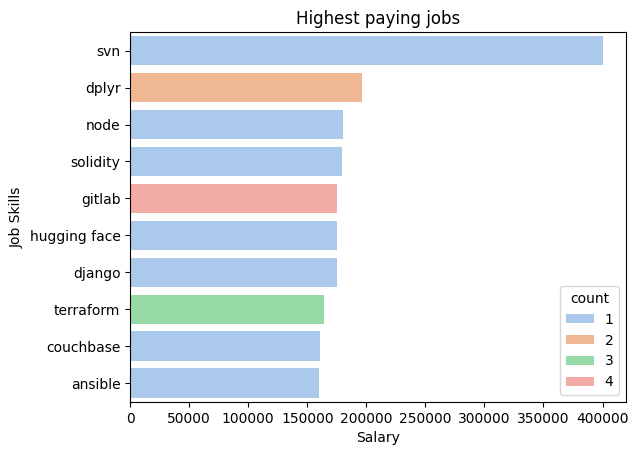

In [31]:
plt.plot()
sns.barplot(x=high_payed['median'] ,y=high_payed.index,color='pink',palette='pastel',hue=high_payed['count'])
plt.title('Highest paying jobs')
plt.xlabel('Salary')
plt.ylabel('Job Skills')
plt.show()

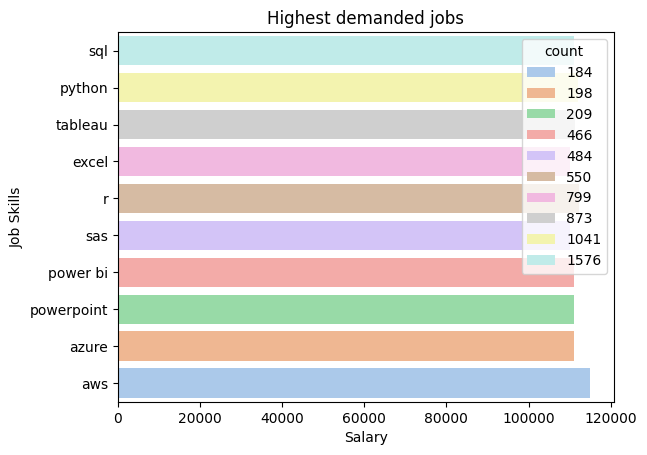

In [32]:
plt.plot()
sns.barplot(x=high_demand['median'] ,y=high_demand.index,color='pink',palette='pastel',hue=high_demand['count'])
plt.title('Highest demanded jobs')
plt.xlabel('Salary')
plt.ylabel('Job Skills')
plt.show()

In [33]:
sample2=df[(df.job_title_short=='Data Analyst')].copy()
sample2.dropna(subset=['salary_year_avg'],inplace=True)
sample2=sample2.explode('job_skills')
sample2

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills,job_month
109,Data Analyst,Senior Supply Chain Analytics Analyst,Anywhere,via Get.It,Full-time,True,"Illinois, United States",2023-10-12 13:02:19,False,True,United States,year,89000.0,NaN,Get It Recruit - Transportation,python,"{'analyst_tools': ['alteryx', 'tableau'], 'pro...",10
109,Data Analyst,Senior Supply Chain Analytics Analyst,Anywhere,via Get.It,Full-time,True,"Illinois, United States",2023-10-12 13:02:19,False,True,United States,year,89000.0,NaN,Get It Recruit - Transportation,r,"{'analyst_tools': ['alteryx', 'tableau'], 'pro...",10
109,Data Analyst,Senior Supply Chain Analytics Analyst,Anywhere,via Get.It,Full-time,True,"Illinois, United States",2023-10-12 13:02:19,False,True,United States,year,89000.0,NaN,Get It Recruit - Transportation,alteryx,"{'analyst_tools': ['alteryx', 'tableau'], 'pro...",10
109,Data Analyst,Senior Supply Chain Analytics Analyst,Anywhere,via Get.It,Full-time,True,"Illinois, United States",2023-10-12 13:02:19,False,True,United States,year,89000.0,NaN,Get It Recruit - Transportation,tableau,"{'analyst_tools': ['alteryx', 'tableau'], 'pro...",10
180,Data Analyst,Data Analyst III,"Dos Palos, CA",via My ArkLaMiss Jobs,Full-time,False,"California, United States",2023-02-27 13:00:39,False,True,United States,year,90250.0,NaN,California Health & Wellness,excel,"{'analyst_tools': ['excel', 'powerpoint']}",2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785187,Data Analyst,Data Analyst,"Lisbon, Portugal",via Ai-Jobs.net,Full-time,False,Portugal,2023-06-07 06:30:33,False,False,Portugal,year,111175.0,NaN,Farfetch,sql,"{'analyst_tools': ['looker'], 'programming': [...",6
785187,Data Analyst,Data Analyst,"Lisbon, Portugal",via Ai-Jobs.net,Full-time,False,Portugal,2023-06-07 06:30:33,False,False,Portugal,year,111175.0,NaN,Farfetch,python,"{'analyst_tools': ['looker'], 'programming': [...",6
785187,Data Analyst,Data Analyst,"Lisbon, Portugal",via Ai-Jobs.net,Full-time,False,Portugal,2023-06-07 06:30:33,False,False,Portugal,year,111175.0,NaN,Farfetch,r,"{'analyst_tools': ['looker'], 'programming': [...",6
785187,Data Analyst,Data Analyst,"Lisbon, Portugal",via Ai-Jobs.net,Full-time,False,Portugal,2023-06-07 06:30:33,False,False,Portugal,year,111175.0,NaN,Farfetch,looker,"{'analyst_tools': ['looker'], 'programming': [...",6


In [34]:
optimal=sample2.groupby('job_skills')['salary_year_avg'].agg(['median','count']).sort_values(by='count',ascending=False)
optimal

,median,count
job_skills,,
sql,92500.0,3079
excel,84479.0,2135
python,98500.0,1838
tableau,95000.0,1657
r,92527.5,1073
...,...,...
svn,400000.0,1
vue,65000.0,1
vmware,147500.0,1


In [35]:
optimal['skill_percent']=(optimal['count']/len(sample2))*100
optimal

,median,count,skill_percent
job_skills,,,
sql,92500.0,3079,14.229596
excel,84479.0,2135,9.866901
python,98500.0,1838,8.494316
tableau,95000.0,1657,7.657824
r,92527.5,1073,4.958869
...,...,...,...
svn,400000.0,1,0.004621
vue,65000.0,1,0.004621
vmware,147500.0,1,0.004621


In [36]:
optimal=optimal[optimal['skill_percent']>2]
optimal=optimal.reset_index()
optimal.drop(optimal.columns[0:1], axis=1)

,median,count,skill_percent
0,92500.0,3079,14.229596
1,84479.0,2135,9.866901
2,98500.0,1838,8.494316
3,95000.0,1657,7.657824
4,92527.5,1073,4.958869
5,90000.0,1042,4.815602
6,90000.0,1006,4.649228
7,80000.0,523,2.417044
8,85000.0,518,2.393937


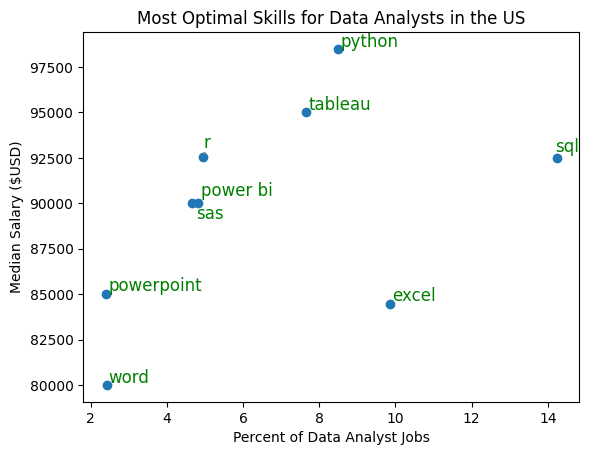

In [40]:
from adjustText import adjust_text
plt.scatter(x=optimal.skill_percent,y=optimal['median'])
plt.xlabel('Percent of Data Analyst Jobs')
plt.ylabel('Median Salary ($USD)')
plt.title('Most Optimal Skills for Data Analysts in the US')
labels=optimal.job_skills.copy()
texts = [plt.text(optimal.skill_percent[i], optimal['median'][i], labels[i], fontsize=12,color='green') for i in range(len(labels))]

adjust_text(texts, arrowprops={ 'arrowstyle': '->',  'color': 'gray'})

plt.show()